# Exercise 1: Linear Regression

In [1]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [2]:
! curl https://cernbox.cern.ch/s/6Ec5pGFEpFWeH6S/download -o ./Data-MLtutorial.tar.gz
! tar -xvzf ./Data-MLtutorial.tar.gz -C ./
! rm ./Data-MLtutorial.tar.gz 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333M    0  333M    0     0  16.8M      0 --:--:--  0:00:19 --:--:-- 20.1M
Data-MLtutorial/
Data-MLtutorial/JetDataset/
Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_10000_20000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_30000_40000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_40000_50000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_50000_60000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_60000_70000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_70000_80000.h5
Data-MLtutorial/JetDataset/jetImage_7_100p_80000_90000.h5


In [3]:
# Load the dataset

target = np.array([])
inputs = np.array([])

datafiles = ['./Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5']

for file_ in datafiles:
    with h5py.File(file_, 'r') as f:
        print("Appending {}".format(file_))
        jets = np.array(f.get('jets'))
        tmp_inputs = np.array(f.get("jets"))[:,[5, 10]] # That's `j_tau2_b1` and `j_tau32_b1`
        tmp_target = np.array(f.get('jets'))[:,6] # That's `j_tau3_b1`
        inputs = np.concatenate([inputs, tmp_inputs], axis=0) if inputs.size else tmp_inputs
        target = np.concatenate([target, tmp_target], axis=0) if target.size else tmp_target

inputs = inputs / 100. # Prevents numerical issues
print(target.shape, inputs.shape)

Appending ./Data-MLtutorial/JetDataset/jetImage_7_100p_0_10000.h5
(10000,) (10000, 2)


Let's try to implement an linear regression that uses [gradient descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html) to optimize its parameters. Use **(Mean Square Error)** as the objective to minimize, given by: $L(y, f(x)) = \frac{1}{2n} \sum\limits^{n} (y - w^TX)^2$.

**Methods to implement (in order):**

- `__init__` - initializes class with `coef_` and `intercept_` attributes set to `None`.
- `init_weights` - accepts an input `num_features`. Sets the `coef_` and `intercept_` attributes to random values drawn from a normal distribution with mean 0 and standard deviation 1 using `np.random.normal`. Use a numpy array for `coef_` and a float for `intercept_`.
- `predict` - accepts an input `X` and outputs a prediction numpy array using the current parameters.
- `score` - accepts inputs `X` and `y_true` and outputs the $R^2$ score of the model.
- `calc_loss` - accepts inputs `X` and `y_true` as numpy arrays. Calculates and returns the Mean Square Error loss metric with the current parameters.
- `calc_grad` - accepts inputs `X` and `y_true` and, using the current parameters, outputs the gradients ([coef_grad, intercept_grad]). Does not update the parameters.
- `fit` - accepts inputs `X`, `y_true` and default kwargs `max_iter`, `learning_rate` and fits a model using gradient descent. Should call `calc_grad` to get gradients from current parameters and update the parameters using the gradient.

In [4]:
class LinearRegressionModel():

    def __init__(self):
        """Initializes class with coef_ and intercept_ attributes set to None."""
        self.coef_ = None
        self.intercept_ = None

    def init_weights(self, num_features):
        """Accepts an input num_features.
        
        Sets the coef_ and intercept_ attributes to random values
        drawn from a normal distribution with mean 0 and standard
        deviation 1 using np.random.normal. Use a numpy array for
        coef_ and a float for intercept_."""
        self.coef_ = np.random.normal(size=num_features)
        self.intercept_ = np.random.normal()

    def predict(self, X):
        """Creates a prediction with the current coef/intercept values"""
        return (X@self.coef_ + self.intercept_)

    def score(self, X, y_true):
        """Accepts inputs X and y_true and outputs the R2 score of the model."""
        y_pred = self.predict(X)
        u = ((y_true - y_pred)**2).sum()
        v = ((y_true - y_true.mean())**2).sum()
        return 1 - u/v

    def calc_loss(self, X, y_true):
        """Calculates the loss value using current coef_ and intercept_ values"""
        y_pred = self.predict(X)
        return np.mean((y_pred - y_true)**2)/2.
    
    def calc_grad(self, X, y_true):
        """Calculates gradients for coef/intercept values"""
        res = y_true - self.predict(X)
        res_mat = np.tile(res.reshape(-1, 1), (1, X.shape[1]))
        coef_grad = -1 * np.mean(res_mat * X, axis=0)
        intercept_grad = -1 * np.mean(res)
        return coef_grad, intercept_grad
    
    def fit(self, X, y_true, max_iter=10000, learning_rate=0.01):
        """
        Accepts inputs X, y_true and default kwargs max_iter,
        learning_rate. Fits a model using gradient descent.
        Should call calc_grad to get gradients from current
        parameters and update the parameters using the gradient.
        """
        for _ in range(max_iter):
            coef_grad, intercept_grad = self.calc_grad(X, y_true)
            self.coef_ -= learning_rate * coef_grad
            self.intercept_ -= learning_rate * intercept_grad

In [5]:
my_regressor = LinearRegressionModel()
my_regressor.init_weights(2)
my_regressor.fit(inputs, target)

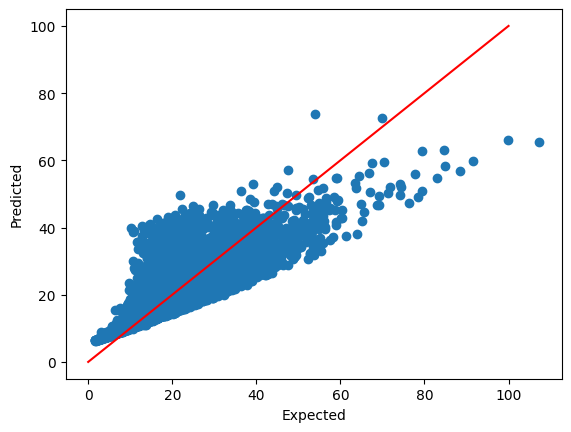

In [6]:
plt.scatter(target, my_regressor.predict(inputs))
plt.plot([0, 100], [0, 100], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted');

In [7]:
print("The resulting equation: {}x + {} has a R2 score of {}".format(
    my_regressor.coef_,
    my_regressor.intercept_,
    my_regressor.score(inputs, target)))

The resulting equation: [43.08062952 -0.36381896]x + 5.3662399130407845 has a R2 score of 0.7355300049066325


**Expected R2: 0.73**

The resulting equation: [  62.36727086 3468.48591801]x + -24.697805784361428 has a R2 score of 0.8940855664261481


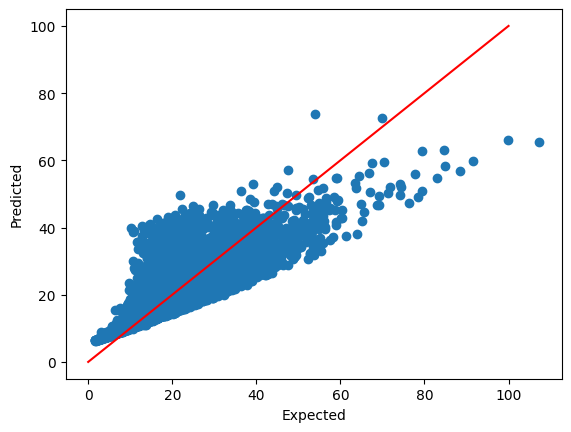

In [8]:
reg = LinearRegression().fit(inputs, target)
print("The resulting equation: {}x + {} has a R2 score of {}".format(
    reg.coef_,
    reg.intercept_,
    reg.score(inputs, target)))
plt.scatter(target, my_regressor.predict(inputs))
plt.plot([0, 100], [0, 100], 'r')
plt.xlabel('Expected')
plt.ylabel('Predicted');